Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

# Importing Modules

In [ ]:
#import modules
import pandas  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
%matplotlib inline

# Loading Dataset

Let's first load the required Employee dataset using pandas's read CSV function.

In [5]:
data = pd.read_csv('Employee_churn_dataset.csv')

In [6]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Here, Original data is separated by comma delimiter(“ , “) in given data set.

You can take a closer look at the data took help of “head()”function of pandas library which returns first five observations.

Similarly “tail()” returns last five observations.

In [7]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


After you have loaded the dataset, you might want to know a little bit more about it. You can check attributes names and datatypes using info().

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
churn                    14999 non-null int64
promotion_last_5years    14999 non-null int64
departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


This dataset has 14,999 samples, and 10 attributes(6 integer, 2 float, and 2 objects).

No variable column has null/missing values.

We can describe 10 attributes in detail as:

1.  satisfaction_level: It is employee satisfaction point, which ranges from 0-1.

2.  last_evaluation: It is evaluated performance by the employer, which also ranges from 0-1.

3.  number_projects: How many numbers of projects assigned to an employee?

4.  average_monthly_hours: How many average numbers of hours worked by an employee in a month?

5.  time_spent_company: time_spent_company means employee experience. The number of years spent by an employee in the company.

6.  work_accident: Whether an employee has had a work accident or not.

7.  promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.

8.  departments: Employee's working department/division.

9.  Salary: Salary level of the employee such as low, medium and high.

10. churn: Whether the employee has left the company or not.

# Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [9]:
left = data.groupby('churn')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
churn,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Here you can interpret, Employees who left the company had low satisfaction level, low promotion rate, low salary, and worked more compare to who stayed in the company.

The describe() function in pandas is convenient in getting various summary statistics. This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [10]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Data Visualization

### Employees Left

Let's check how many employees were left?

Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

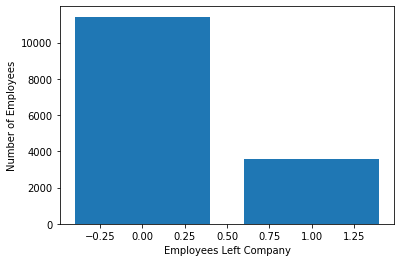

In [11]:
left_count=data.groupby('churn').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

In [13]:
data.churn.value_counts()

0    11428
1     3571
Name: churn, dtype: int64

Here, you can see out of 15,000 approx 3,571 were left, and 11,428 stayed. The no of employee left is 23 % of the total employment.

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on How many projects?

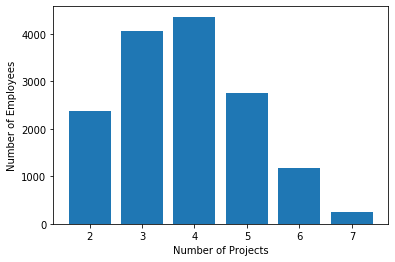

In [14]:
num_projects=data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

Most of the employee is doing the project from 3-5.

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?

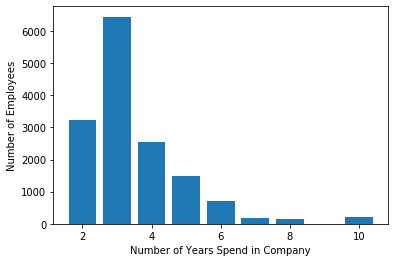

In [15]:
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

Most of the employee experience between 2-4 years. Also, there is a massive gap between 3 years and 4 years experienced employee.

### Subplots using Seaborn

This is how you can analyze the features one by one, but it will be time-consuming. The better option is here to use Seaborn library and plot all the graphs in a single run using subplots.

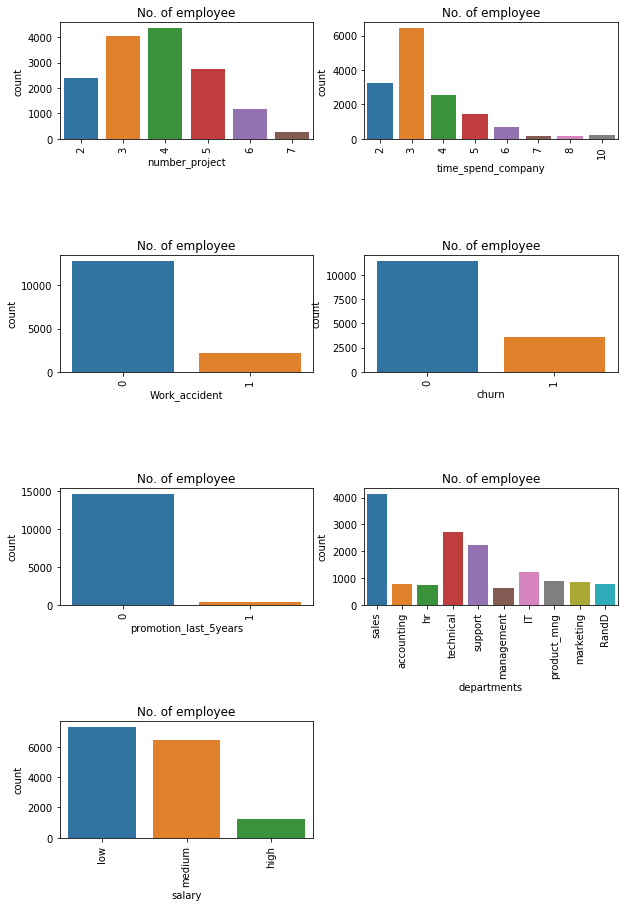

In [19]:
features=['number_project','time_spend_company','Work_accident','churn', 'promotion_last_5years','departments','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

We can observe the following points in the above visualization:

1. Most of the employee is doing the project from 3-5.


2. There is a huge drop between 3 years and 4 years experienced employee.


3. The no of employee left is 23 % of the total employment.


4. A decidedly less number of employee get the promotion in the last 5 year.


5. The sales department is having maximum no.of employee followed by technical and support


6. Most of the employees are getting salary either medium or low.

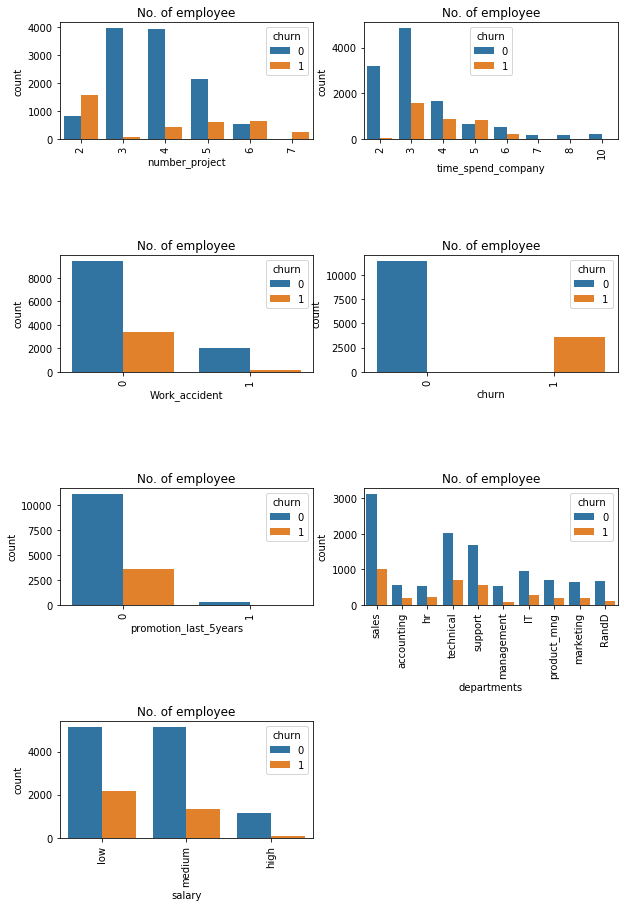

In [21]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='churn')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

We can observe the following points in the above visualization:

1. The employee who had done 6 and 7 projects, left the company it seems to like that they were overloaded with work.


2. The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company.


3. Those who promotion in last 5 years they didn't leave, i.e., all those left they didn't get the promotion in the previous 5 years.

### Data Analysis and Visualization Summary:

Following features are most influencing a person to leave the company: 

1. Promotions: Employees are far more likely to quit their job if they haven't received a promotion in the last 5 years.


2. Time with Company: Here, The three-year mark looks like a time to be a crucial point in an employee's career. Most of them quit their job around the three-year mark. Another important point is 6-years point, where the employee is very unlikely to leave.


3. Number Of Projects: Employee engagement is another critical factor to influence the employee to leave the company. Employees with 3-5 projects are less likely to leave the company. The employee with less and more number of projects are likely to leave.


4. Salary: Most of the employees that quit among the mid or low salary groups.

# Cluster Analysis

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [23]:
#import module
from sklearn.cluster import KMeans
# Filter data
churn_emp =  data[['satisfaction_level', 'last_evaluation']][data.churn == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(churn_emp)

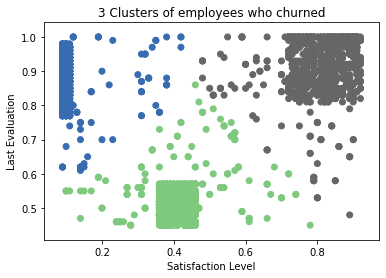

In [24]:
# Add new column "label" annd assign cluster labels.
churn_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(churn_emp['satisfaction_level'], churn_emp['last_evaluation'], c=churn_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who churned')
plt.show()

Here, Employee who left the company can be grouped into 3 type of employees:

1. High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners.

2. Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.
                                        
3. Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match'.